# **Projeto Final - ICD**
## Impacto da Produção Agrícola no Desmatamento das Áreas de Floresta do Brasil 



## Dados Utilizados



*   Brazilan Agricultural Production -

   https://www.kaggle.com/llatyki/brazilan-agricultural-production?select=yield.csv

*   Brazilian Amazon Rainforest Degradation 1999-2019 - 

  https://www.kaggle.com/mbogernetto/brazilian-amazon-rainforest-degradation?select=inpe_brazilian_amazon_fires_1999_2019.csv


## **1. Introdução**


### **Perguntas:**


1.   Como foi o crescimento da produção de cada uma das plantações?
2.   Existe uma correlação entre a redução da área de floresta de um estado e o aumento de sua produção?
3.   Para quais plantações essa correlação é maior?
4.   Existe uma correlação entre a quantidade de incêndios na Amazônia e o desenvolvimento da produção agrícola?




## **2. Análise Exploratória**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import geopandas as gpd


### **Dataset 1  - Brazilian Amazon Rainforest Degradation 1999-2019**

In [3]:
amazon_fires_df = pd.read_csv('https://raw.githubusercontent.com/thiagomrs/icd2021projetoFinal/main/datasets/brazilian-amazon-rainforest-degradation/inpe_brazilian_amazon_fires_1999_2019.csv')
def_area_df = pd.read_csv('https://raw.githubusercontent.com/thiagomrs/icd2021projetoFinal/main/datasets/brazilian-amazon-rainforest-degradation/def_area_2004_2019.csv')

In [4]:
amazon_fires_df['state'] = amazon_fires_df['state'].str.replace(u"MATO GROSSO", "Mato Grosso")
amazon_fires_df['state'] = amazon_fires_df['state'].str.replace(u"AMAZONAS", "Amazonas")
amazon_fires_df['state'] = amazon_fires_df['state'].str.replace(u"PARA", "Pará")
amazon_fires_df['state'] = amazon_fires_df['state'].str.replace(u"RONDONIA", "Rondônia")
amazon_fires_df['state'] = amazon_fires_df['state'].str.replace(u"RORAIMA", "Roraima")
amazon_fires_df['state'] = amazon_fires_df['state'].str.replace(u"MARANHAO", "Maranhão")
amazon_fires_df['state'] = amazon_fires_df['state'].str.replace(u"TOCANTINS", "Tocantins")
amazon_fires_df['state'] = amazon_fires_df['state'].str.replace(u"ACRE", "Acre")
amazon_fires_df['state'] = amazon_fires_df['state'].str.replace(u"AMAPA", "Amapá")


##### **Revised Data Dictionary**

| Variable  | Description                                                | Data Type |
| --------- | ---------------------------------------------------------- | --------- |
| year | Year of occurrence    | Ordinal |
| month | Month of occurrence  | Ordinal |
| state | State of occurrence  | Nominal |
| latitude | Average latitude of all occurrences in this month, year and state  | Numerical |
| longitude | Average longitude of all occurrences in this month, year and state | Numerical |
| firespots | Number of forest fire outbreaks | Numerical |


**Amazônia Legal**

Segundo o IBGE, "A Amazônia Legal corresponde à área de atuação da Superintendência de Desenvolvimento da Amazônia - SUDAM delimitada em consonância ao Art. 2o da Lei Complementar n. 124, de 03.01.2007. A região é composta por 772 municípios distribuídos da seguinte forma: 52 municípios de Rondônia, 22 municípios do Acre, 62 do Amazonas, 15 de Roraima, 144 do Pará, 16 do Amapá, 139 do Tocantins, 141 do Mato Grosso, bem como, por 181 Municípios do Estado do Maranhão situados ao oeste do Meridiano 44º, dos quais, 21 deles, estão parcialmente integrados na Amazônia Legal. Possui uma superfície aproximada de 5.015.067,75 km², correspondente a cerca de 58,9% do território brasileiro."

Fonte: https://www.ibge.gov.br/geociencias/cartas-e-mapas/mapas-regionais/15819-amazonia-legal.html?=&t=o-que-e


##### **Revised Data Dictionary**

| Variable  | Description                                                | Data Type |
| --------- | -----------------------------------| ------ |
| Ano | Year of occurrence    | Ordinal |
| AC | Deforested area in Acre state (km²) | Numerical |
| AM | Deforested area in Amazonas state (km²) | Numerical |
| AP | Deforested area in Amapa state (km²) | Numerical |
| MA | Deforested area in Maranhao state (km²) | Numerical |
| MT | Deforested area in Mato Grosso state (km²) | Numerical |
| PA | Deforested area in Para state (km²) | Numerical |
| RO | Deforested area in Rondonia state (km²) | Numerical |
| RR | Deforested area in Roraima state (km²) | Numerical |
| TO | Deforested area in Tocantins state (km²) | Numerical |
| AMZ LEGAL | Deforested area in Legal Amazon (km²) | Numerical |



<AxesSubplot:title={'center':'Média de queimadas por mês, dados de 1999 a 2019'}, xlabel='Mês', ylabel='Média das Queimadas'>

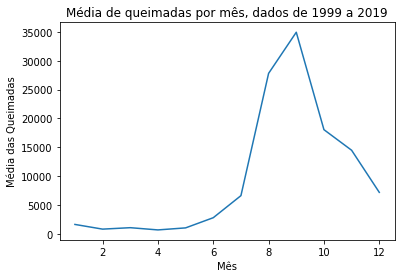

In [5]:
sum_firespots_amz_legal = amazon_fires_df.groupby(['year', 'month'])['firespots'].sum()
sum_firespots_amz_legal.groupby('month').mean().plot(title="Média de queimadas por mês, dados de 1999 a 2019", xlabel="Mês", ylabel="Média das Queimadas")

<AxesSubplot:title={'center':'Média de queimadas por mês, dados de 1999 a 2019'}, xlabel='Mês', ylabel='Média das Queimadas'>

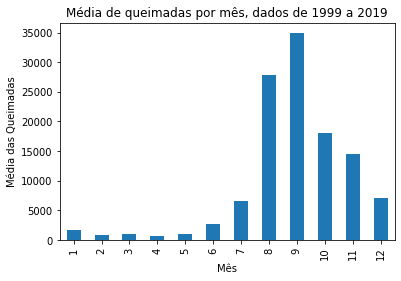

In [6]:

sum_firespots_amz_legal.groupby('month').mean().plot(kind="bar", title="Média de queimadas por mês, dados de 1999 a 2019", xlabel="Mês", ylabel="Média das Queimadas")

<AxesSubplot:title={'center':'Mediana de queimadas por mês, dados de 1999 a 2019'}, xlabel='Mês', ylabel='Mediana das Queimadas'>

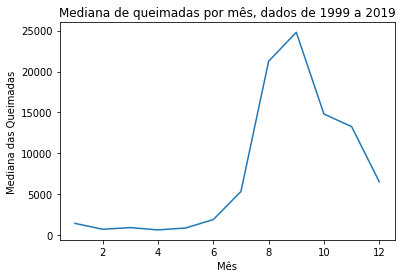

In [7]:

sum_firespots_amz_legal.groupby('month').median().plot(title="Mediana de queimadas por mês, dados de 1999 a 2019", xlabel="Mês", ylabel="Mediana das Queimadas")

<AxesSubplot:title={'center':'Média de queimadas por ano, dados de 1999 a 2019'}, xlabel='Ano', ylabel='Média das Queimadas'>

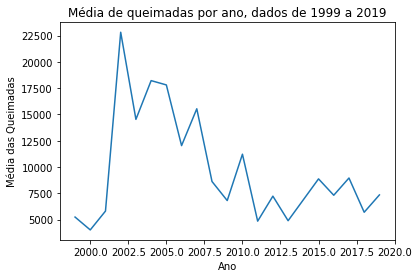

In [8]:

sum_firespots_amz_legal.groupby('year').mean().plot(title="Média de queimadas por ano, dados de 1999 a 2019", xlabel="Ano", ylabel="Média das Queimadas")

<AxesSubplot:title={'center':'Média de queimadas por ano, dados de 1999 a 2019'}, xlabel='Ano', ylabel='Média das Queimadas'>

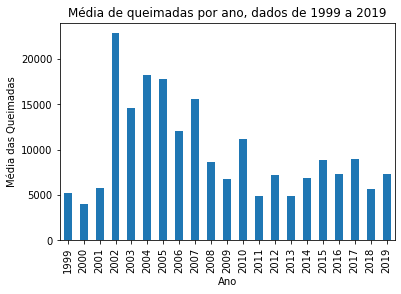

In [9]:

sum_firespots_amz_legal.groupby('year').mean().plot(kind="bar", title="Média de queimadas por ano, dados de 1999 a 2019", xlabel="Ano", ylabel="Média das Queimadas")

<AxesSubplot:title={'center':'Total de queimadas por ano nos estados que compõem a Amazônia Legal'}, xlabel='Ano', ylabel='Número de Queimadas'>

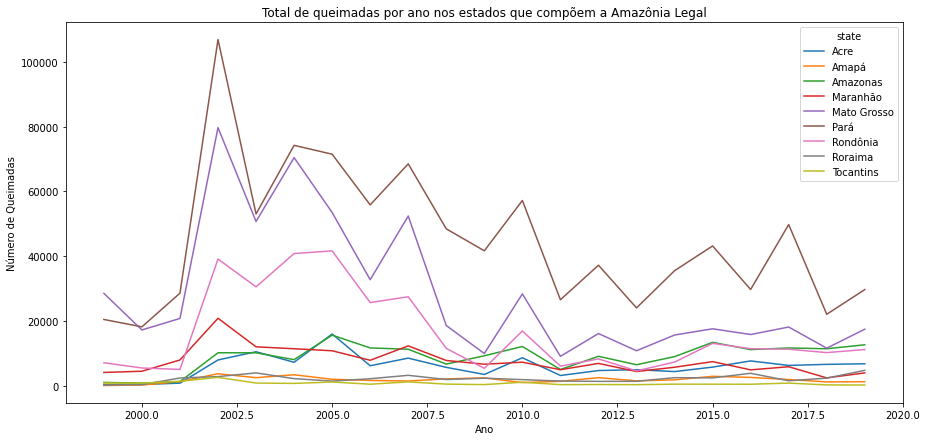

In [10]:
fig, ax = plt.subplots(figsize=(15,7))
amazon_fires_df.groupby(['year','state'])['firespots'].sum().unstack().plot(ax=ax, title="Total de queimadas por ano nos estados que compõem a Amazônia Legal", xlabel="Ano", ylabel="Número de Queimadas")

<AxesSubplot:title={'center':'Média de queimadas por mês (1999-2019) nos estados que compõem a Amazônia Legal'}, xlabel='Mês', ylabel='Média de Queimadas'>

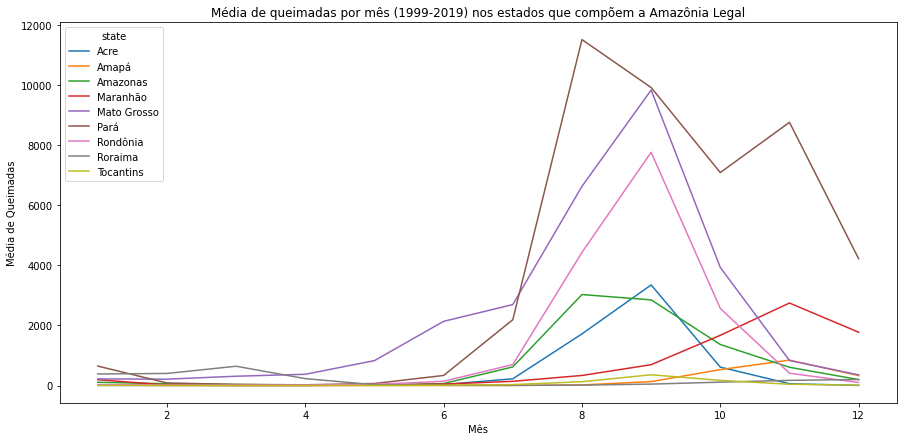

In [11]:
fig, ax = plt.subplots(figsize=(15,7))
amazon_fires_df.groupby(['month','state'])['firespots'].mean().unstack().plot(ax=ax, title="Média de queimadas por mês (1999-2019) nos estados que compõem a Amazônia Legal", xlabel="Mês", ylabel="Média de Queimadas")

In [12]:
brazil_map_df = gpd.read_file('maps/BR_UF_2020/BR_UF_2020.shp')
brazil_mesoregions_map_df = gpd.read_file('maps/BR_Mesorregioes_2020/BR_Mesorregioes_2020.shp')
brazil_microregions_map_df = gpd.read_file('maps/BR_Microrregioes_2020/BR_Microrregioes_2020.shp')

In [13]:
sum_firespots_per_state_and_year = amazon_fires_df.groupby(['state', 'year'])['firespots'].sum()
mean_firespots_per_state = sum_firespots_per_state_and_year.groupby('state').mean()

#### Média anual de queimadas por estado de 1999 a 2019

/home/analumd/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


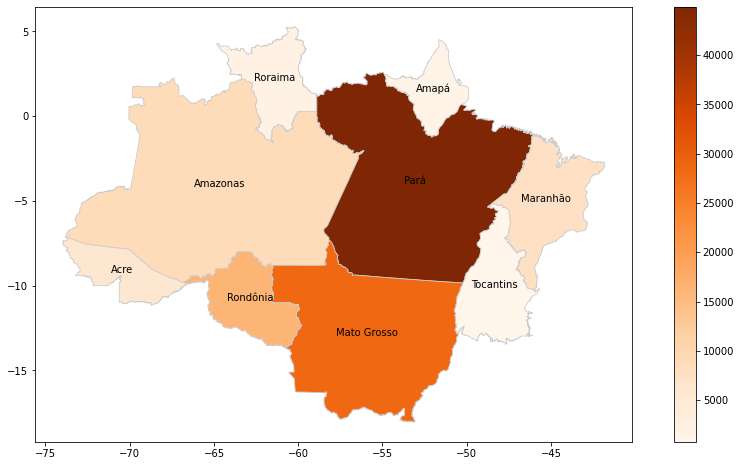

In [14]:
amazon_fires_brazil_map_df = pd.merge(brazil_map_df, mean_firespots_per_state, how='inner', left_on='NM_UF', right_on='state')
amazon_fires_brazil_map_df.sort_values(by='firespots')

ax = amazon_fires_brazil_map_df.plot(column=amazon_fires_brazil_map_df['firespots'], cmap='Oranges', linewidth=0.8, edgecolor='0.8', legend=True, figsize=(15,8))

amazon_fires_brazil_map_df.apply(lambda x: ax.annotate(s=x.NM_UF, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);

In [15]:
data = amazon_fires_df.groupby('month').mean()['firespots']
data.median()

543.9542465499676

No handles with labels found to put in legend.


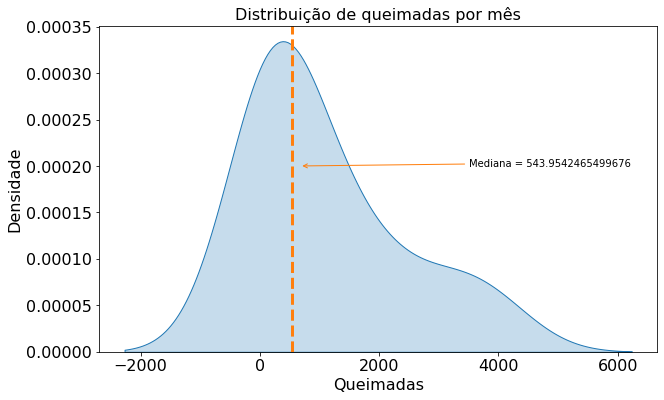

In [19]:
col = sns.color_palette()
plt.figure(figsize=(10, 6))

sns.kdeplot(data=data, shade=True)

plt.axvline(x=data.median(), ymax=1.0, linestyle='--', color=col[1])
plt.annotate('Mediana = ' + str(data.median()),
             xy=(data.median(), 0.00020),
             xytext=(3500, 0.00020),
             arrowprops=dict(arrowstyle='->', color=col[1], shrinkB=10))
plt.title('Distribuição de queimadas por mês', fontdict={'fontsize': 16})
plt.xlabel('Queimadas')
plt.ylabel('Densidade')
plt.legend().remove()
plt.show()

### **Dataset 2  - Brazilan Agricultural Production**

In [17]:

df_yield = pd.read_csv('https://raw.githubusercontent.com/thiagomrs/icd2021projetoFinal/main/datasets/brazilian-agricultural-production/yield.csv?token=AKCY5EMQEPS5O7SS4AXLHGTA3TMZ2%27').drop(columns='Unnamed: 0')
df_planted_area = pd.read_csv('https://raw.githubusercontent.com/thiagomrs/icd2021projetoFinal/main/datasets/brazilian-agricultural-production/planted_area.csv').drop(columns='Unnamed: 0')


In [18]:
plt.rcParams['figure.figsize']  = (14, 8)
plt.rcParams['axes.labelsize']  = 16
plt.rcParams['axes.titlesize']  = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 3

In [20]:
df_yield_per_grain = df_yield.drop(columns='Year').groupby(['Grain']).sum().copy()

In [21]:

df_yield_per_grain.insert(0, 'Total', np.zeros(df_yield_per_grain.index.shape))

In [22]:
df_yield['Year'] = df_yield['Year'].astype(str)

<AxesSubplot:title={'center':'Produção por grão'}, xlabel='Grain'>

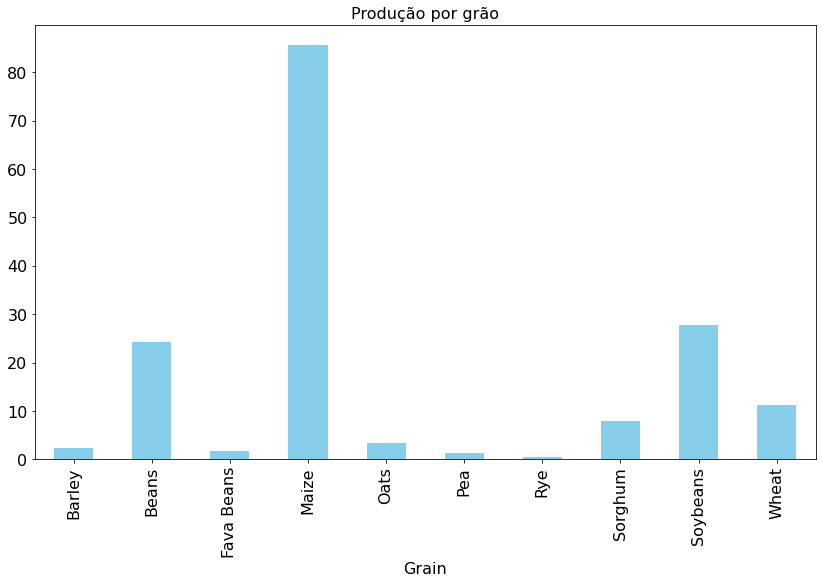

In [23]:
for grain in df_yield_per_grain.index:
  df_yield_per_grain['Total'].loc[grain] = df_yield_per_grain.drop(columns='Total').loc[grain].mean()
df_yield_per_grain['Total'].plot.bar(x='Grain', title='Produção por grão', color='skyblue')

<AxesSubplot:xlabel='Year'>

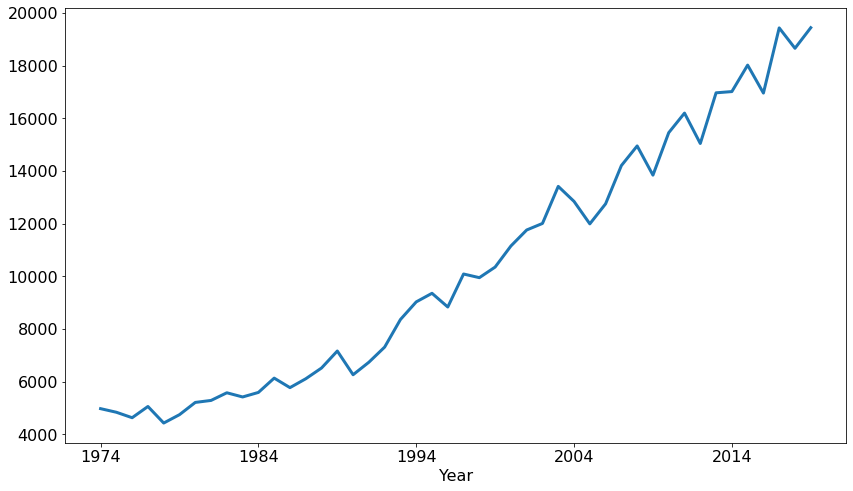

In [24]:
df_yield_per_grain_per_year = df_yield.groupby(['Grain', 'Year']).sum().copy()

df_yield_per_grain_per_year['Total'] = df_yield_per_grain_per_year.sum(axis=1)

df_yield_per_grain_per_year['Total'].loc['Maize'].plot.line()

([<matplotlib.axis.XTick at 0x7fd4ab3f5ba8>,
 [Text(0, 0, '1974'),
  Text(10, 0, '1984'),
  Text(20, 0, '1994'),
  Text(30, 0, '2004'),
  Text(40, 0, '2014'),
  Text(45, 0, '2019')])

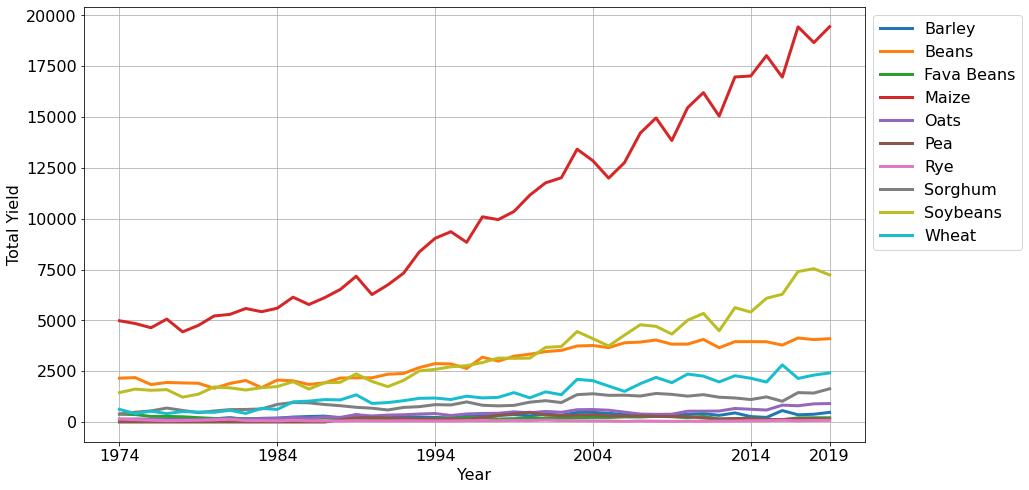

In [34]:

df_yield_per_grain_per_year.groupby('Grain')['Total'].plot(legend=True, xlabel='Year', ylabel='Total Yield', grid=True)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks([0,10,20,30,40,45], [1974, 1984, 1994, 2004, 2014,2019])

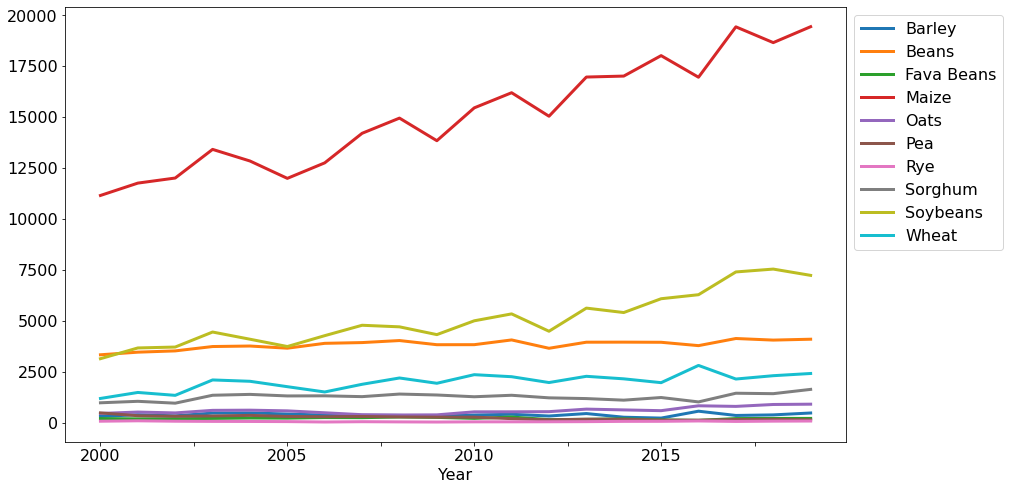

In [25]:

df_yield_per_grain_per_year[df_yield_per_grain_per_year.index.get_level_values('Year') >= '2000']['Total'].unstack(level=0).plot(kind='line', subplots=False)
plt.legend(bbox_to_anchor=(1,1))

### Produção por grão

In [26]:
estados = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO', 'DF']
estados_amazonia = ['AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RR', 'RO', 'TO']
df_states = df_yield[['Year', 'Grain']].copy()
df_states.head()
for estado in estados:
    df_states[estado] = df_yield.filter(regex=(".*\(({})\)".format(estado)), axis=1).sum(axis=1, numeric_only=True)
df_states['Grain'] = df_states['Grain'].astype(str)
df_states['Year'] = df_states['Year'].astype(str)

In [27]:
df_yield_per_grain = df_states.drop(columns='Year').groupby(['Grain']).sum().copy()
df_yield_per_grain.insert(0, 'Total', np.zeros(df_yield_per_grain.index.shape))

for grain in df_yield_per_grain.index:
  df_yield_per_grain['Total'].loc[grain] = df_yield_per_grain.drop(columns='Total').loc[grain].sum()
df_yield_per_grain['Total']

Grain
Barley         13379.530100
Beans         135474.408880
Fava Beans      9220.390467
Maize         476005.321848
Oats           18550.750185
Pea             7405.709334
Rye             3163.986127
Sorghum        43884.421144
Soybeans      153967.604837
Wheat          62903.266056
Name: Total, dtype: float64

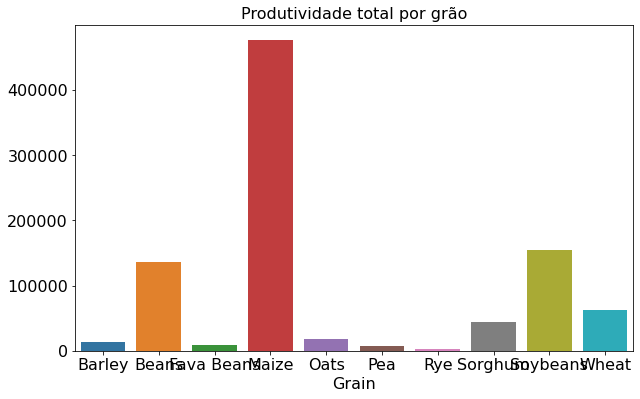

In [28]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x=df_yield_per_grain['Total'].index, y=df_yield_per_grain['Total'].values)
plt.title('Produtividade total por grão', fontsize=16)
plt.show()

### Produção por grão por ano

In [29]:
df_yield_per_grain_per_year = df_states.groupby(['Grain', 'Year']).sum().copy()
df_yield_per_grain_per_year['Total'] = df_yield_per_grain_per_year.sum(axis=1)

In [30]:
grains = ['Barley', 'Beans', 'Fava Beans', 'Maize', 'Oats', 'Pea', 'Rye', 'Sorghum', 'Soybeans', 'Wheat']

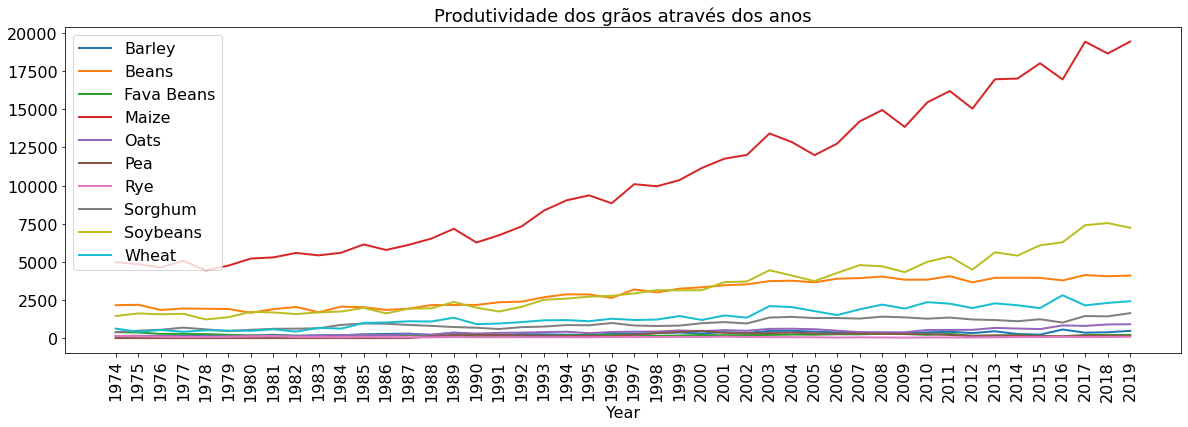

In [31]:
fig = plt.figure(figsize=(20,6))
plt.rcParams['lines.linewidth'] = 2
for grain in grains:
    sns.lineplot(x=df_yield_per_grain_per_year['Total'].loc[grain].index, y=df_yield_per_grain_per_year['Total'].loc[grain].values, label=grain)
plt.xticks(rotation=90)
plt.title('Produtividade dos grãos através dos anos', fontsize=18)
plt.show()

### Produção total por ano

In [32]:
df_years = df_states.groupby(['Year']).sum().copy()

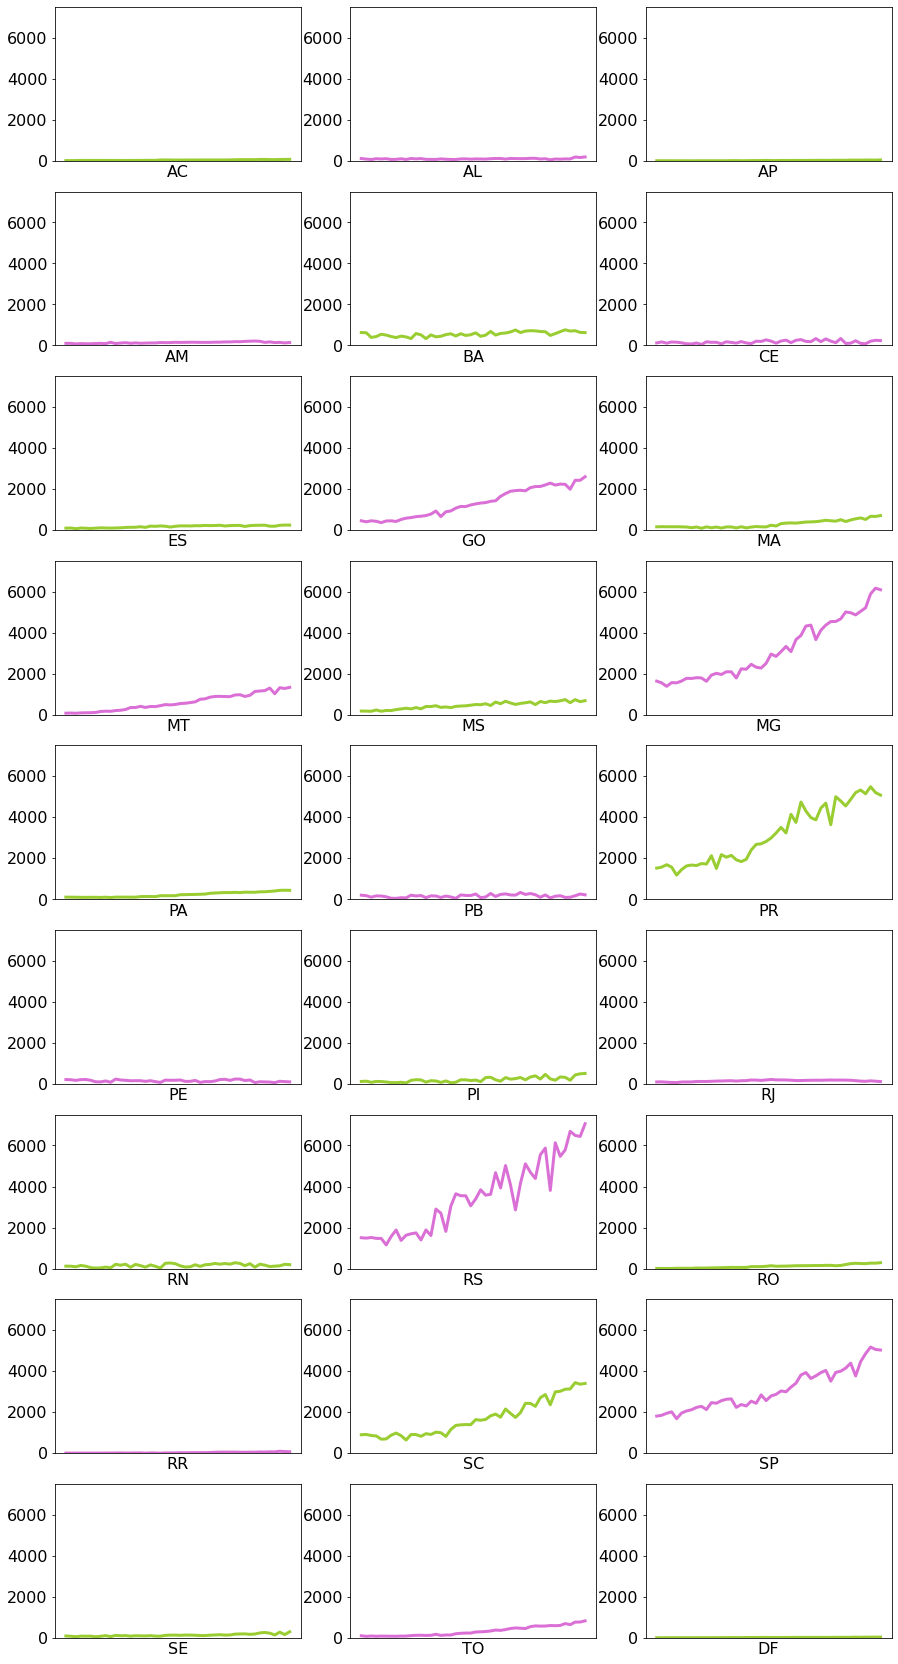

In [33]:
fig = plt.figure(figsize=(15,30))
gs = fig.add_gridspec(9,3)
plt.rcParams['lines.linewidth'] = 3
for index, state in enumerate(df_years):
    fig.add_subplot(gs[index//3, index%3])
    color = "orchid"
    if index % 2 == 0:
        color = "yellowgreen"
    sns.lineplot(x=df_years.index, y=df_years[state].values, color=color)
    plt.ylim([0,7500]) 
    plt.xticks([])
    plt.xlabel(state)
plt.show()

### Divisão por presidente

In [34]:
anos_por_presidente = [['1974', '1975', '1976', '1977', '1978'], ['1979', '1980', '1981', '1982', '1983', '1984'], ['1985', '1986', '1987', '1988', '1989'], ['1990', '1991', '1992'], ['1993', '1994'], ['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002'], ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010'], ['2011', '2012', '2013', '2014', '2015', '2016'], ['2017', '2018'], ['2019']]
presidentes = ['Ernesto Geisel', 'João Figueiredo', 'José Sarney', 'Fernando Collor', 'Itamar Franco', 'Fernando Henrique Cardoso', 'Lula', 'Dilma Rousseff', 'Michel Temer', 'Jair Bolsonaro']
direita = ['Ernesto Geisel', 'João Figueiredo', 'José Sarney', 'Fernando Collor', 'Itamar Franco', 'Fernando Henrique Cardoso', 'Michel Temer', 'Jair Bolsonaro']
esquerda = ['Lula', 'Dilma Rousseff']

In [35]:
df_president = pd.DataFrame(index=presidentes)
df_president[estados] = np.zeros((len(df_president.index), len(estados)))
for i in range(len(anos_por_presidente)):
    for estado in estados:
        df_president.iloc[i].loc[estado] = df_years[estado].loc[anos_por_presidente[i]].mean()
df_president.head()

,AC,AL,AP,AM,BA,CE,ES,GO,MA,MT,...,RJ,RN,RS,RO,RR,SC,SP,SE,TO,DF
Ernesto Geisel,17.307930,91.509851,5.407905,91.425960,524.400105,147.949285,90.929258,420.361315,162.561658,81.832915,...,84.708404,117.593168,1488.301995,7.237915,3.123844,839.623314,1859.241111,75.475583,82.963903,3.674180
João Figueiredo,21.150465,88.022600,4.621007,103.063311,422.961693,105.392750,97.347192,504.511048,136.281725,151.153748,...,108.013164,69.516910,1547.645214,19.839114,5.493862,825.949557,2128.842033,81.082259,84.694976,5.803720
José Sarney,20.821531,84.305340,6.346157,118.129909,473.771301,143.347785,135.700999,749.879268,133.285451,315.441519,...,144.937515,156.743971,1904.895341,43.684310,10.039069,923.805358,2546.591500,97.306075,130.492030,9.119482
Fernando Collor,25.195284,80.677339,8.806636,121.271949,515.457397,143.051121,170.056899,828.113878,124.352367,383.657433,...,153.086980,119.246394,2517.387588,54.963419,7.500969,988.831335,2301.734905,93.006520,130.027228,12.226437
Itamar Franco,43.253829,79.630886,12.945833,140.111806,518.138037,150.182791,194.740134,1111.829077,161.047403,466.965024,...,189.544495,141.822708,3598.312308,94.386534,6.624049,1367.781621,2484.861065,99.719453,208.854126,14.524670


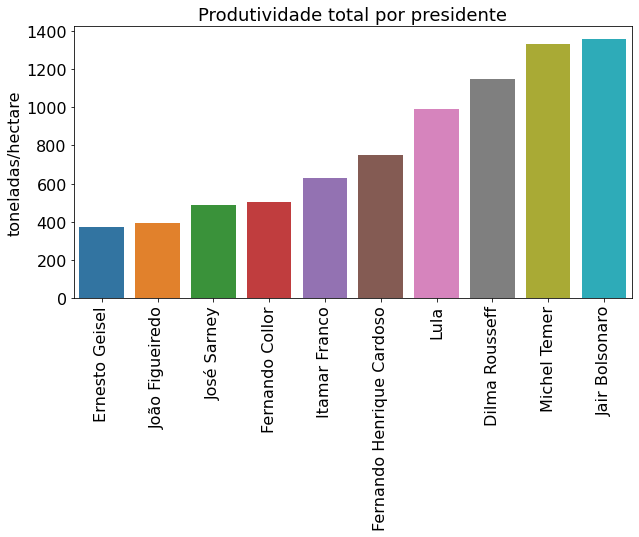

In [36]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=df_president.mean(axis=1).index, y=df_president.mean(axis=1).values)
plt.title('Produtividade total por presidente', fontsize=18)
plt.ylabel('toneladas/hectare')
plt.xticks(rotation=90)
plt.show()

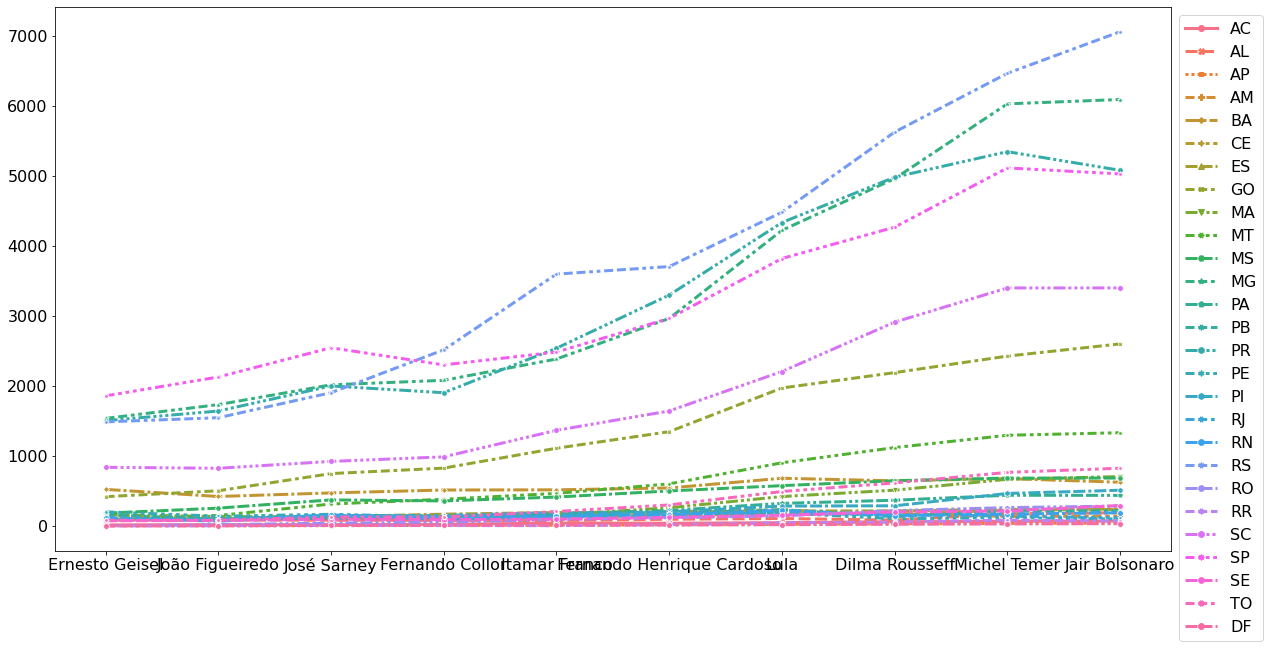

In [37]:
ig = plt.figure(figsize=(20,10))
sns.lineplot(data=df_president, markers=True)
plt.legend(bbox_to_anchor=(1,1))

## **3. Teste de Hipotese**

### **Dataset 1  - Brazilian Amazon Rainforest Degradation 1999-2019**

### **Dataset 2  - Brazilan Agricultural Production**

**Hipótese nula:** a orientação política do presidente não afeta a produtividade agrícola de grãos durante seu mandato.  
**Hipótese alternativa:** a orientação política do presidente afeta a produtividade agrícola de grãos durante seu mandato.

In [38]:
def bootstrap_mean_ab(df1, df2, n=10000):
    size1 = len(df1.columns)
    size2 = len(df2.columns)
    values1 = np.zeros(n)
    values2 = np.zeros(n)
    values_diff = np.zeros(n)
    for i in range(n):
        sample1 = df1.sample(size1, replace=True, random_state=i)
        sample2 = df2.sample(size2, replace=True, random_state=i*3)
        values1[i] = sample1.mean().iloc[0]
        values2[i] = sample2.mean().iloc[0]
        values_diff[i] = sample1.mean().iloc[0] - sample2.mean().iloc[0]
    return values1, values2, values_diff

In [39]:
serie_direita = df_president.loc[direita].median(axis=0)
serie_esquerda = df_president.loc[esquerda].median(axis=0)

In [40]:
v_direita, v_esquerda, v_diff = bootstrap_mean_ab(pd.DataFrame(serie_direita), pd.DataFrame(serie_esquerda))

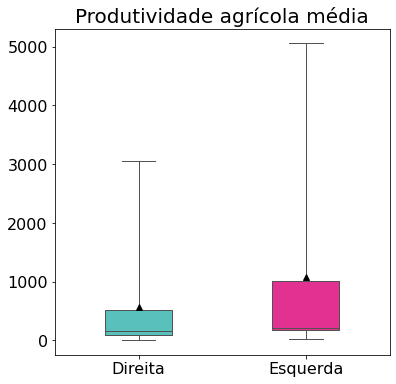

In [41]:
fig = plt.figure(figsize=(6,6))
plt.rcParams['lines.linewidth'] = 1
sns.boxplot(data=[v_direita, v_esquerda], whis=[2.5, 97.5], showfliers=False, showmeans=True, meanprops={"markeredgecolor": "black", "markerfacecolor": "black"}, width=0.4, palette=["mediumturquoise", "deeppink"])
plt.xticks([0,1], ['Direita', 'Esquerda'])
plt.title('Produtividade agrícola média', fontsize=20)
plt.show()

Não existe uma diferença significativa entre a produtividade de grãos com base na ideologia do presidente.

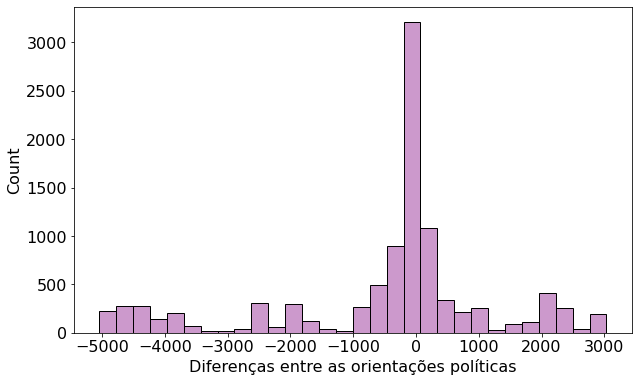

In [42]:
fig = plt.figure(figsize=(10,6))
sns.histplot(v_diff, bins=30, alpha=0.4, color="purple")
plt.xlabel("Diferenças entre as orientações políticas")
plt.show()

O histograma das diferenças entre a produtividade agrícola durante os mandatos de presidentes com orientações políticas diferentes tem uma alta concentração no zero, o que mostra que essas diferenças não são estatisticamente significativas.

## **4. Correlação**

In [43]:
df_planted_area = pd.read_csv('https://raw.githubusercontent.com/thiagomrs/icd2021projetoFinal/main/datasets/brazilian-agricultural-production/planted_area.csv').drop(columns='Unnamed: 0')
df_fires = pd.read_csv('https://raw.githubusercontent.com/thiagomrs/icd2021projetoFinal/main/datasets/brazilian-amazon-rainforest-degradation/inpe_brazilian_amazon_fires_1999_2019.csv').drop(columns=['latitude', 'longitude', 'month'])


In [44]:
df_fires = df_fires.groupby(['year', 'state']).sum().copy()

In [45]:
df_fires_new = pd.DataFrame(columns=['Year', 'ACRE', 'AMAPA', 'AMAZONAS', 'MARANHAO', 'MATO GROSSO', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS'])
fire_states = ['ACRE', 'AMAPA', 'AMAZONAS', 'MARANHAO', 'MATO GROSSO', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS']

In [46]:
df_fires_new['Year'] = np.array(range(1999, 2020))

In [47]:
for year in range(1999, 2020):
    aux = []
    for state in fire_states:
        aux.append(df_fires.loc[year].loc[state][0])
    aux = [year] + aux
    df_fires_new[df_fires_new['Year'] == year] = np.array(aux)

In [48]:
df_fires_new.columns = ['Year', 'AC', 'AP', 'AM', 'MA', 'MT', 'PA', 'RO', 'RR', 'TO']
estados = ['AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RR', 'RO', 'TO']
df_states_area = df_planted_area[['Year', 'Grain']].copy()
for estado in estados:
    df_states_area[estado] = df_planted_area.filter(regex=(".*\(({})\)".format(estado)), axis=1).sum(axis=1, numeric_only=True)


In [49]:
df_group_area = df_states_area.groupby('Year').sum().drop(index=range(1974,2004)).copy()
df_group_fires = df_fires_new.groupby('Year').sum().drop(index=range(1999, 2004)).copy()

In [50]:
df_amazon = pd.read_csv('https://raw.githubusercontent.com/thiagomrs/icd2021projetoFinal/main/datasets/brazilian-amazon-rainforest-degradation/def_area_2004_2019.csv')
df_amazon.set_index('Ano/Estados', inplace=True)


In [53]:
df_group_area_left = df_group_area.loc[:2016].copy()
df_group_area_right = df_group_area.loc[2017:].copy()

df_group_fires_left = df_group_fires.loc[:2016].copy()
df_group_fires_right = df_group_fires.loc[2017:].copy()

df_amazon_left = df_amazon.loc[:2016].copy()
df_amazon_right = df_amazon.loc[2017:].copy()

### Correlações através dos anos entre a área plantada com: área plantada e números de queimadas

In [54]:

corr_fires_left = df_group_area_left.corrwith(df_group_fires_left, axis=0).copy()
corr_fires_right = df_group_area_right.corrwith(df_group_fires_right, axis=0).copy()
corr_fires_total = df_group_area.corrwith(df_group_fires, axis=0).copy()

corr_amazon_left = df_group_area_left.corrwith(df_amazon_left, axis=0).copy()
corr_amazon_right = df_group_area_right.corrwith(df_amazon_right, axis=0).copy()
corr_amazon_total = df_group_area.corrwith(df_amazon, axis=0).copy()

In [55]:
corr_fires_total

AC    0.256177
AM   -0.014136
AP   -0.163669
MA   -0.753269
MT   -0.598840
PA   -0.437380
RR    0.471312
RO   -0.571882
TO   -0.419776
dtype: float64

Para a maioria dos estados, a correlação entre o aumento da área desmatada e o número de queimadas é negativa, mas para o Acre e Roraima, ela é positiva.

In [56]:
corr_amazon_total

AC           0.083129
AM          -0.406421
AP          -0.553155
MA          -0.809872
MT          -0.520343
PA          -0.353993
RR           0.179666
RO          -0.437772
TO          -0.539607
AMZ LEGAL         NaN
dtype: float64

Não existe uma alta correlação positiva entre a área desmatada e área plantada.

In [57]:
def plot_series(data, title):
    sns.barplot(x=data.index, y=data.values)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.ylim((-1,1))
    plt.show()

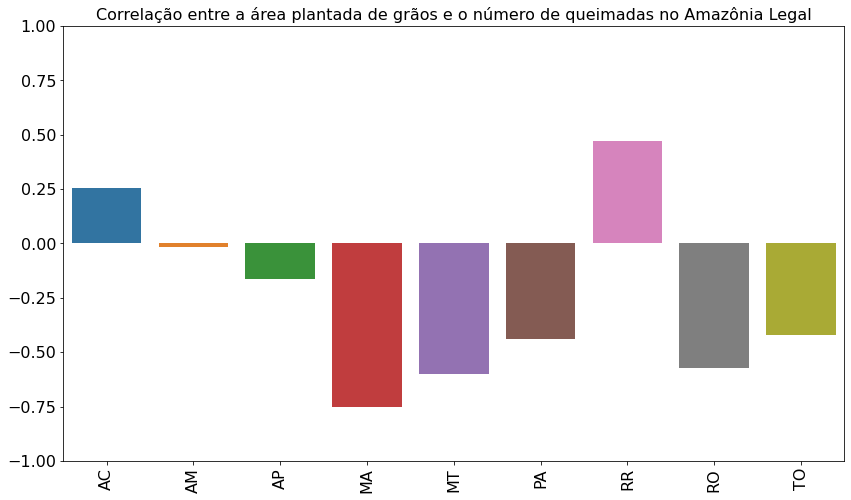

In [58]:
plot_series(corr_fires_total, 'Correlação entre a área plantada de grãos e o número de queimadas no Amazônia Legal')

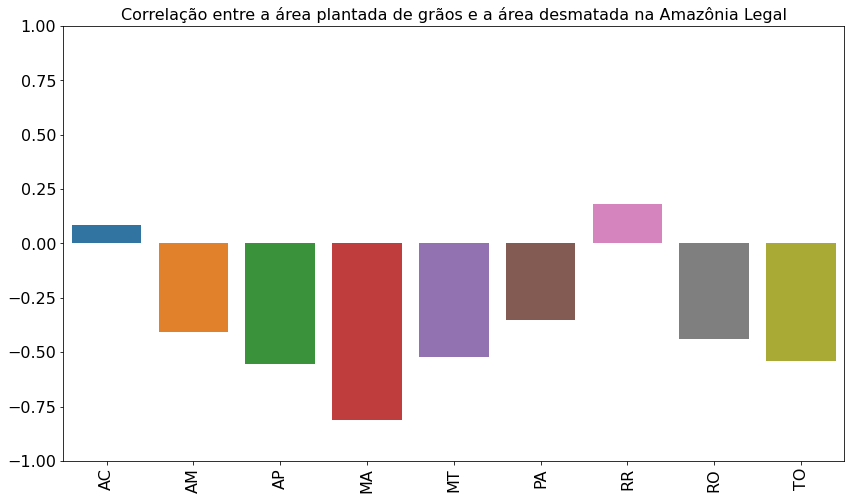

In [59]:
plot_series(corr_amazon_total[:-1], 'Correlação entre a área plantada de grãos e a área desmatada na Amazônia Legal')

#### Como podemos ver dos gráficos e dos valores da correlação, ela é em geral negativa para a maioria dos estados em ambas situações, e também tem valores parecidos para o mesmo estado.

## **4.1 Teste de hipótese:**
**Hipótese nula:** as diferenças entre a correlação da área plantada e do número de queimadas/área desmatada podem ser devido ao acaso.

**Hipótese a ser testada:** essas diferenças podem ser atribuídas à ideologia do governo.

In [61]:
v_right_amazon, v_left_amazon, v_diff_amazon = bootstrap_mean_ab(pd.DataFrame(corr_amazon_right), pd.DataFrame(corr_amazon_left))

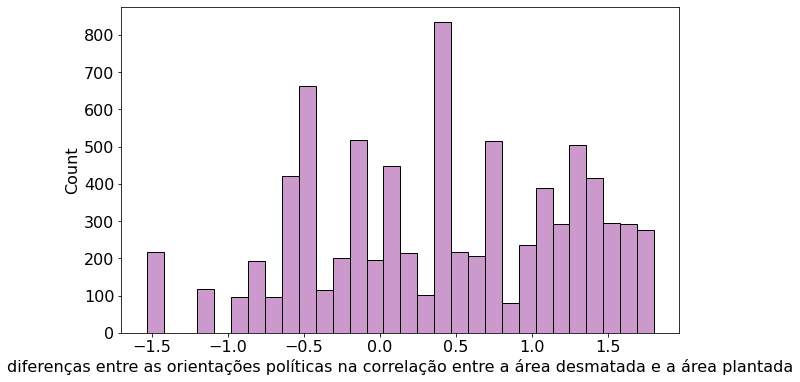

In [63]:

fig = plt.figure(figsize=(10,6))
sns.histplot(v_diff_amazon, bins=30, alpha=0.4, color="purple")
plt.xlabel("diferenças entre as orientações políticas na correlação entre a área desmatada e a área plantada")
plt.show()

In [64]:
v_right_fires, v_left_fires, v_diff_fires = bootstrap_mean_ab(pd.DataFrame(corr_fires_right), pd.DataFrame(corr_fires_left))

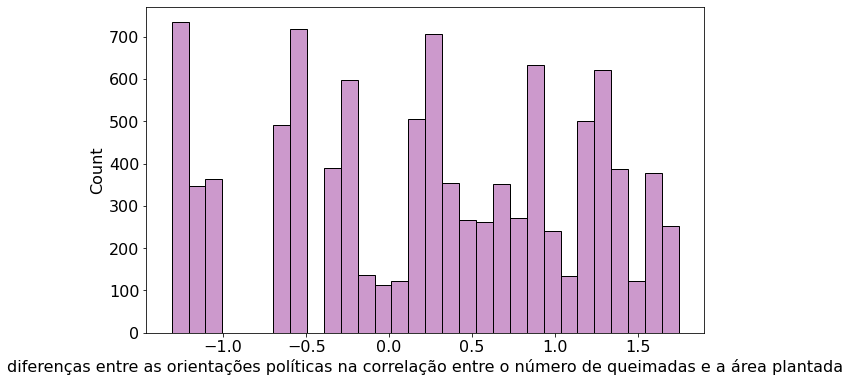

In [65]:

fig = plt.figure(figsize=(10,6))
sns.histplot(v_diff_fires, bins=30, alpha=0.4, color="purple")
plt.xlabel("diferenças entre as orientações políticas na correlação entre o número de queimadas e a área plantada")
plt.show()

#### Não podemos rejeitar a hipótese nula em nenhuma dessas situações. Nada indica que a ideologia política do partido do presidente afeta a correlação entre a área plantada de grãos e o número de queimadas/área desmatada durante seu mandato.

## **4.2 Análise das correlações dos estados**

#### Como foi visto nos gráficos acima sobre a correlação, o estado que tem seu valor mais alto em ambas situações foi o Maranhão:

In [66]:
df_MA = pd.DataFrame(columns=['Área desmatada', 'Área plantada', 'Queimadas'])
df_MA['Área desmatada'] = df_amazon['MA']
df_MA['Queimadas'] = df_group_fires['MA']
df_MA['Área plantada'] = df_group_area['MA']

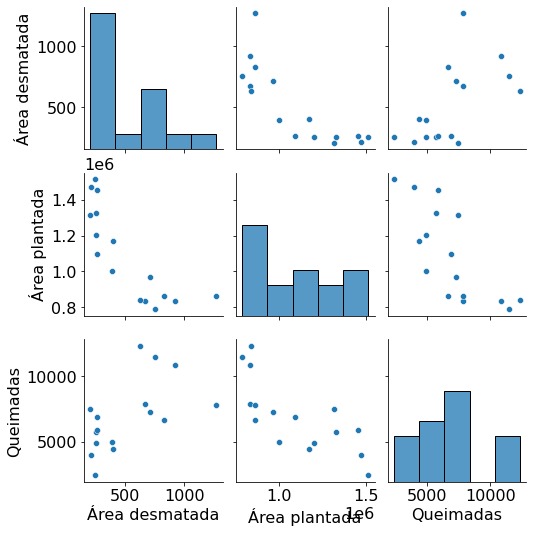

In [67]:

sns.pairplot(df_MA)

In [68]:
queimadas_MA = df_MA['Queimadas']
desmatada_MA = df_MA['Área desmatada']
plantada_MA = df_MA['Área plantada']
lr1_MA = ss.linregress(plantada_MA, desmatada_MA)
lr2_MA = ss.linregress(plantada_MA, queimadas_MA)
r2_MA_desmatada = round(lr1_MA.rvalue**2, 3)
r2_MA_queimadas = round(lr2_MA.rvalue**2, 3)
'Valores de R2 para o Maranhão:', r2_MA_desmatada, r2_MA_queimadas

('Valores de R2 para o Maranhão:', 0.656, 0.567)

Text(0.5, 1.0, 'Regressão linear entre a área plantada e a área desmatada no Maranhão')

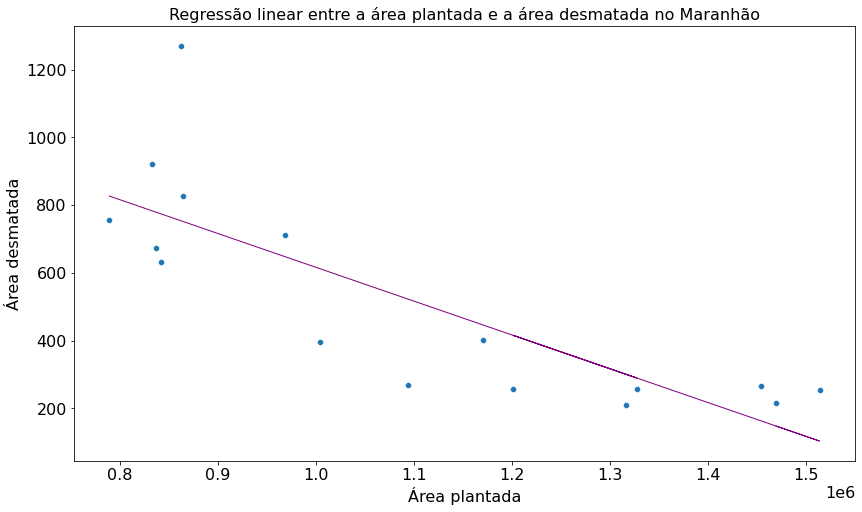

In [69]:

sns.scatterplot(x=plantada_MA, y=desmatada_MA)
y_hat_desmatada_MA = lr1_MA.slope * plantada_MA + lr1_MA.intercept
plt.plot(plantada_MA, y_hat_desmatada_MA, color="purple")
plt.title('Regressão linear entre a área plantada e a área desmatada no Maranhão')

Text(0.5, 1.0, 'Regressão linear entre a área plantada e o número de queimadas no Maranhão')

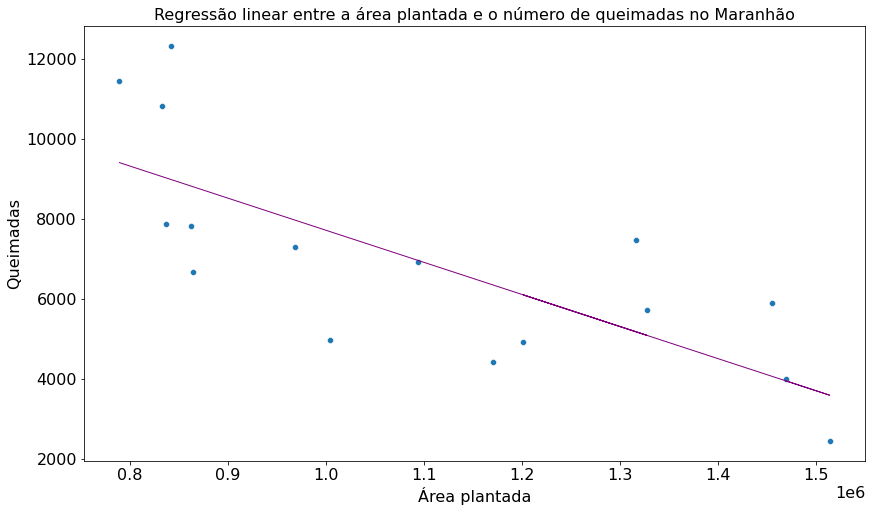

In [70]:

sns.scatterplot(x=plantada_MA, y=queimadas_MA)
y_hat_queimadas_MA = lr2_MA.slope * plantada_MA + lr2_MA.intercept
plt.plot(plantada_MA, y_hat_queimadas_MA, color="purple")
plt.title('Regressão linear entre a área plantada e o número de queimadas no Maranhão')

### Análise para todos estados entre a área plantada e área desmatada:

In [71]:

df_all = []
for estado in estados:
    df_ = pd.DataFrame(columns=['Área desmatada', 'Área plantada', 'Queimadas'])
    df_['Área desmatada'] = df_amazon[estado]
    df_['Queimadas'] = df_group_fires[estado]
    df_['Área plantada'] = df_group_area[estado]
    df_all.append(df_)

In [73]:
lr_all_desmatada = []
lr_all_queimadas = []
for i in range(len(estados)):
    lr_all_desmatada.append(ss.linregress(df_all[i]['Área plantada'], df_all[i]['Área desmatada']))
    lr_all_queimadas.append(ss.linregress(df_all[i]['Área plantada'], df_all[i]['Queimadas']))

In [76]:
def subplots_reg(col, lr, title, color):
    fig = plt.figure(figsize=(15,10))
    gs = fig.add_gridspec(3,3)
    plt.rcParams['lines.linewidth'] = 3
    for i in range(len(estados)):
        fig.add_subplot(gs[i//3, i%3])
        sns.scatterplot(x=df_all[i]['Área plantada'], y=df_all[i][col])
        y_hat = lr[i].slope * df_all[i]['Área plantada'] + lr[i].intercept
        plt.plot(df_all[i]['Área plantada'], y_hat, color=color)
        plt.tight_layout()
        plt.suptitle(title)
        plt.title(f'{estados[i]} (R^2: {round(lr[i].rvalue**2, 2)})')

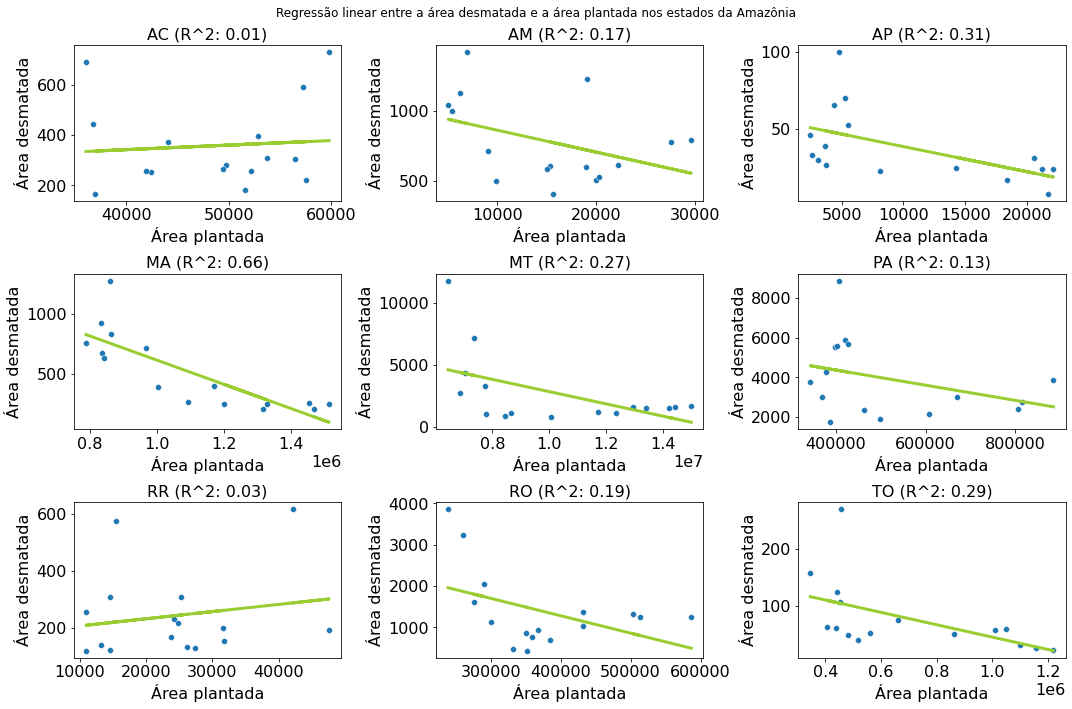

In [77]:

subplots_reg('Área desmatada', lr_all_desmatada, 'Regressão linear entre a área desmatada e a área plantada nos estados da Amazônia', 'yellowgreen')

### Análise para todos estados entre a área plantada e o número de queimadas:

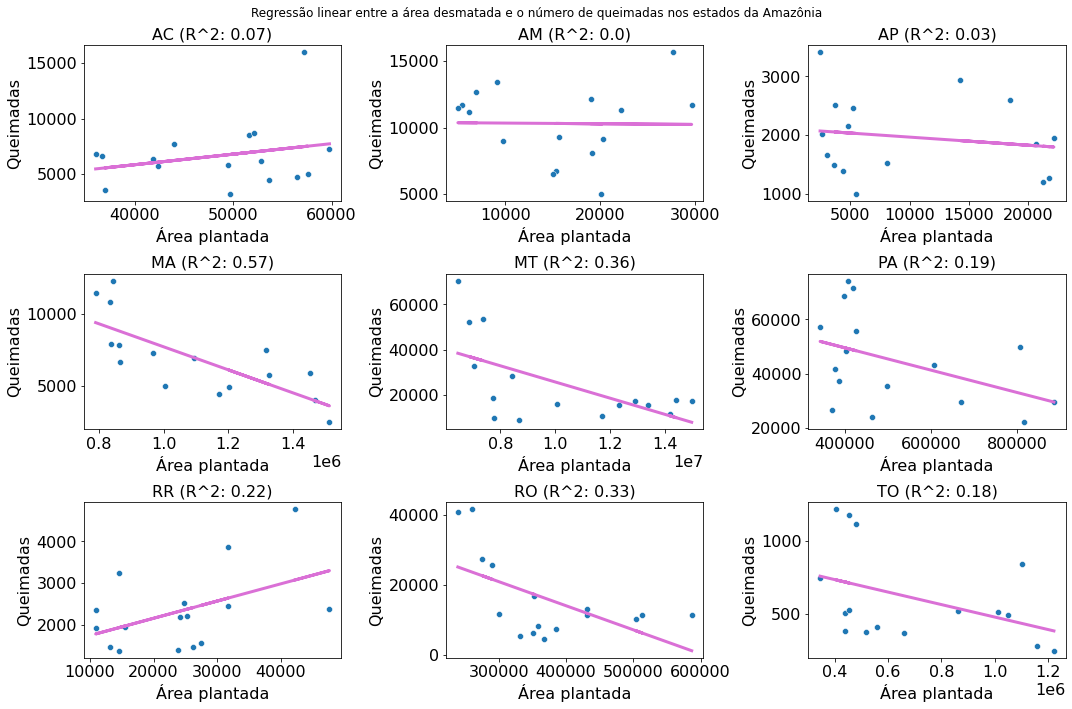

In [78]:
subplots_reg('Queimadas', lr_all_queimadas, 'Regressão linear entre a área desmatada e o número de queimadas nos estados da Amazônia', 'orchid')

## **5. Conclusão**